# PRG04｜回帰分析

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# comment out below
import json


def dict2rc(dict): return {f'{k1}.{k2}': v for k1,
                           d in dict.items() for k2, v in d.items()}


with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')


## 単回帰分析

- 式：y = a + bx
- 最小二乗法で係数を推定

In [2]:
data1 = pd.read_csv('data/sampleData1.csv')
data1.head()


,y,x
0,-0.033035,-0.021055
1,-0.007061,-0.009424
2,0.095191,0.043984
3,-0.002934,0.009756
4,-0.116546,-0.028559


Estimation: y = 0.0049 + 1.5466 * x


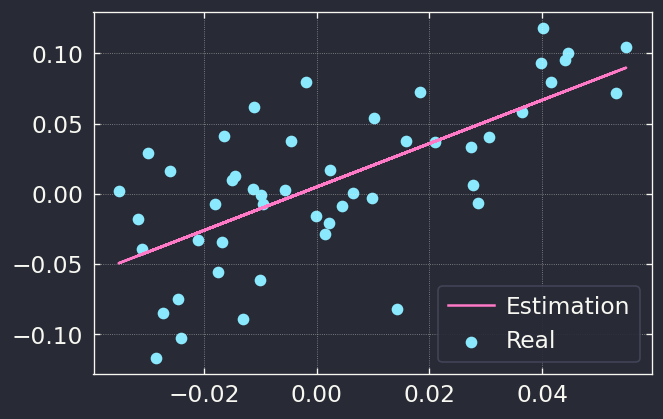

In [10]:
x = data1['x']
y = data1['y']

mx = np.mean(x)
my = np.mean(y)
vxx = np.mean(x*x) - mx*mx
vxy = np.mean(x*y) - mx*my

b = vxy / vxx
a = my - b * mx

print(f'Estimation: y = {a:.4f} + {b:.4f} * x')

y_pred = a + b*x
plt.scatter(x, y, color='C0', label='Real')
plt.plot(x, y_pred, color='C1', label='Estimation')
plt.legend()


In [4]:
def calc_R2(y_real, y_pred):
    # 回帰偏差
    my = np.mean(y_real)
    res_var = np.mean(np.power(y_real - y_pred, 2))  # 回帰変動
    tot_var = np.mean(np.power(y_real - my, 2))     # 全変動
    return 1 - res_var / tot_var


R2 = calc_R2(y, y_pred)
print(f'R2: {R2:.2f}')


R2: 0.47


## 重回帰分析

- y = Xw
- 最小二乗法で係数ベクトルを推定

In [5]:
data2 = pd.read_csv('data/sampleData2.csv')
data2.head()


,y,x1,x2,x3,x4
0,-0.033035,-0.021055,-0.081527,0.01315,0.004523
1,-0.007061,-0.009424,0.092880,0.01300,0.004415
2,0.095191,0.043984,0.051469,0.01395,0.004338
3,-0.002934,0.009756,0.028534,0.01280,0.003962
4,-0.116546,-0.028559,-0.141381,0.01260,0.003877


In [6]:
y = data2['y']
X = data2[['x1', 'x2', 'x3', 'x4']]
X['x0'] = 1
X.head()


,x1,x2,x3,x4,x0
0,-0.021055,-0.081527,0.01315,0.004523,1
1,-0.009424,0.092880,0.01300,0.004415,1
2,0.043984,0.051469,0.01395,0.004338,1
3,0.009756,0.028534,0.01280,0.003962,1
4,-0.028559,-0.141381,0.01260,0.003877,1


Estimation: y = Xw
Coefficients: w = [ 1.37462566  0.19550219 -5.72529848 12.13686433  0.01953262]


Text(0, 0.5, 'Prediction')

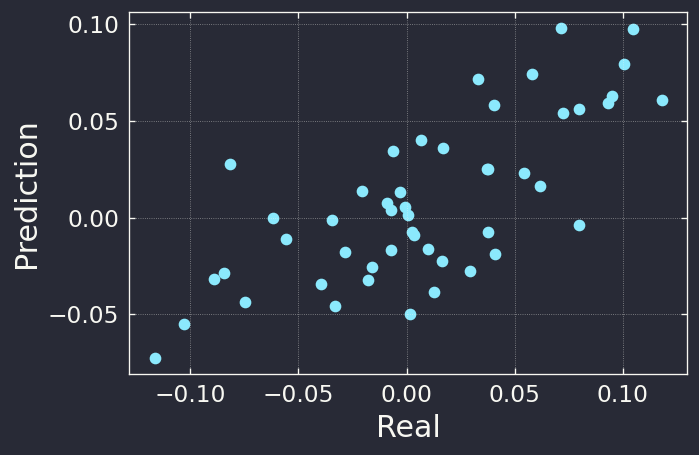

In [12]:
XTX = np.dot(X.T, X)
XTy = np.dot(X.T, y)
w = np.dot(np.linalg.inv(XTX), XTy)

print(f'Estimation: y = Xw')
print(f'Coefficients: w = {w}')

y_pred = np.dot(X, w)
plt.scatter(y, y_pred)
plt.xlabel('Real')
plt.ylabel('Prediction')


In [8]:
R2 = calc_R2(y, y_pred)
print(f'R2: {R2:.2f}')


R2: 0.54
